In [34]:
from analyseFunc import *
import matplotlib.pyplot as plt
import numpy as np
import os
import astropy.units as u
import astropy.constants as c
plt.style.use('stylesheet.mplstyle')

%config InlineBackend.figure_formats = ['svg']

In [24]:
def get_runList(modellog):
    with open(modellog,'r') as log:
        argue0 = log.readline().split()[0]
        while argue0 != 'model':
            line = log.readline().split()
            argue0 = line[0]
            
        nameGridVar1 = line[1]
        nameGridVar2 = line[2]
        lines = log.readlines()
        models = {}
        models['model'] = np.full(len(lines),40*' ')
        models[nameGridVar1] = np.zeros(len(lines))
        models[nameGridVar2] = np.zeros(len(lines))
        models['Vars'] = [nameGridVar1,nameGridVar2]
        for (line_count, line) in enumerate(lines):
            items = line.split()
            for (col_count, col_name) in enumerate(['model',nameGridVar1,nameGridVar2]):
                value = items[col_count]
                models[col_name][line_count] = value
    return models

In [25]:
exampleRuns = get_runList('TestGrid-models.txt')
exampleRuns

{'model': array(['TestGrid-0000', 'TestGrid-0001', 'TestGrid-0002', 'TestGrid-0003',
        'TestGrid-0004', 'TestGrid-0005', 'TestGrid-0006', 'TestGrid-0007',
        'TestGrid-0008'], dtype='<U40'),
 'Vs_km': array([20., 30., 40., 20., 30., 40., 20., 30., 40.]),
 'nH_init': array([  1000.,   1000.,   1000.,  10000.,  10000.,  10000., 100000.,
        100000., 100000.]),
 'Vars': ['Vs_km', 'nH_init']}

In [23]:
masterDir = '/Users/dengyw/Workspace/Shock_1.1_rev122/'
workDir = '/Users/dengyw/Workspace/Shock_1.1_rev122/PDShockGrid'

In [37]:
4//3+1

2

In [64]:
import math

def plot_H2_emissivity(model, lines = ['0-0S(1)','1-0S(1)','2-1S(1)'], logX = False, logY = False, save_PDF = False, formatVar1 = '.0f', formatVar2 = '.0f'):
    numlines = len(lines)

    fig = plt.figure(figsize = (6.6,3))
    
    rows = math.ceil(numlines/3)
    cols = math.ceil(numlines/rows)
    for i,line in enumerate(lines):
        ax = fig.add_subplot(rows,cols,i+1)
        ax.set_title(line[:3]+' '+line[3:], weight = 'bold')
        for j,run in enumerate(model['model']):
            xmin, xmax = 1e-12,1e-12
            resultDir = masterDir+'output/'+run
            os.chdir(resultDir)
            H2_lines = get_H2line()
            label = model['Vars'][0] + '=' + format(model[model['Vars'][0]][j], formatVar1) + ', '+ model['Vars'][1] + '=' + format(model[model['Vars'][1]][j],formatVar2)
            xaxis = ((H2_lines['distance']*u.cm).to(u.pc)).value
            ax.plot(xaxis, H2_lines[lines[i]], label = label, linewidth = 1)
            if np.max(xaxis) > xmax:
                xmax = np.max(xaxis)
        
        if i == len(lines) - 1:
            ax.legend(framealpha = 0)
        ax.set_xlabel('z [pc]') 
        ax.set_xlim(xmin,xmax)
    
        if logX == True:
            ax.set_xscale('log')
        
        if logY == True:
            ax.set_yscale('log')
        ax.set_ylabel(r'Emissivity [erg s$^{-1}$ cm$^{-3}$]') 
    if save_PDF == True: 
        plt.savefig('H2_emissivity.pdf',bbox_inches = 'tight')

    


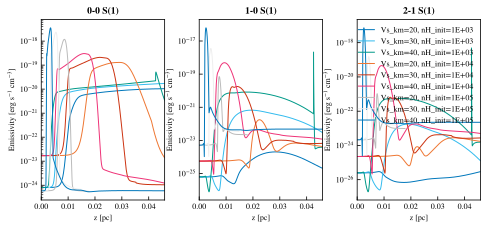

In [65]:
plot_H2_emissivity(exampleRuns, logY = True, formatVar2 = '.0E')